In [ ]:
!pip install geopandas
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
school_districts = geopandas.read_file("districts.geojson")
school_districts.school_dist = school_districts.school_dist.astype(int)

In [22]:
attendance = pd.read_csv( "attendance_data.csv" ).query(
    "category == 'All Students' and grade == 'All Grades'"
)
attendance[(attendance["pct_attendance"] != "s")]
attendance.pct_attendance = attendance.pct_attendance.astype(float)

In [23]:
school_districts_attendance = school_districts.merge( attendance, 
                                                    left_on="school_dist", 
                                                    right_on="district")

In [28]:
temp_attendance = attendance[(attendance["pct_attendance"] != "s")]

# Get school -> 2018 attendance mapping.
attendance_2018 = temp_attendance[temp_attendance.year == 2018]
attendance_2018 = dict(
    zip(attendance_2018.district, attendance_2018.pct_attendance.astype(float))
)

# Get school -> 2022 attendance mapping.
attendance_2022 = temp_attendance[temp_attendance.year == 2022]
attendance_2022 = dict(
    zip(attendance_2022.district, attendance_2022.pct_attendance.astype(float))
)


# Get difference in attendance.
def get_diff(district):
    return attendance_2022[district] - attendance_2018[district]


attendance_diff = pd.DataFrame(attendance.district.unique())
attendance_diff.columns = ["district"]
attendance_diff["attendance_chg_2018_2022"] = attendance_diff.district.apply(
    get_diff
)

In [29]:
school_districts_attendance_chg = school_districts.merge( attendance_diff, 
                                                    left_on="school_dist", 
                                                    right_on="district")

Text(0.5, 1.0, 'NYC Decrease in Attendance by District, All Grades (2018 to 2022)')

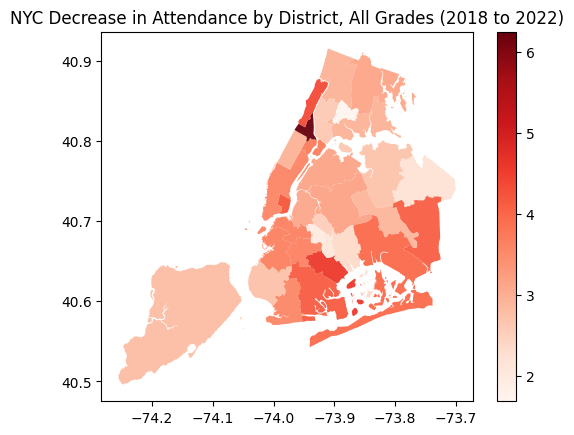

In [37]:
school_districts_attendance_chg["neg_chg"] = school_districts_attendance_chg.attendance_chg_2018_2022 * -1
school_districts_attendance_chg.plot(column="neg_chg", cmap="Reds", legend=True, alpha=.95)
plt.title("NYC Decrease in Attendance by District, All Grades (2018 to 2022)")